# Load and clean the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

filename = 'Answers data - 2017-10-27T07_38_48.xlsx'
with open(filename, 'rb') as file:
    answers = pd.read_excel(file)
    
filename = 'Candidate data - 2017-10-27T07_25_36.xlsx'
with open(filename, 'rb') as file:
    candidates = pd.read_excel(file)

In [2]:
# Skip garbage in the end
answers = answers.head(976)

In [3]:
numeric_columns = []

for i, value in enumerate(candidates.head(1).values[0]):
    if type(value)==float and value > 0:
        numeric_columns.append(i)
print(numeric_columns)

[26, 29, 32, 41, 44, 47, 51, 53, 55, 57, 59, 63, 67]


In [4]:
numeric_questions = candidates.columns[numeric_columns].values
for question in numeric_questions:
    print(question)

3. Yliopistoni tulisi tehdä yhteistyötä alueen korkeakoulujen kanssa lakkauttamalla päällekkäisiä koulutusohjelmia.
4. Tulevaisuudessa yhä useamman opiskelijan pitäisi siirtyä työelämään pelkällä kandidaatin tutkinnolla.
5. Suomessa on lukumäärällisesti liian monta yliopistoa.
8. Ylioppilaskuntani antaa tarpeeksi osallistumismahdollisuuksia kansainvälisille opiskelijoille.
9. Ylioppilaskunta voi ottaa kantaa muihinkin asioihin kuin suoraan koulutukseen, yliopistoihin ja opintososiaalisiin asioihin (opintotuki, asuminen, yms.) liittyviin kysymyksiin.
10. Ylioppilaskuntien automaatiojäsenyys tulee säilyttää.
12. Ylioppilaskunnan jäsenmaksua tulisi
13. Edustajiston jäsenen tulee noudattaa edustajistoryhmän kantaa merkittävissä kysymyksissä. 
14. AYY:n asuntojen vuokria tulisi korottaa, jotta niiden laatua voitaisiin parantaa. 
15. AYY:n tulee kannustaa taloudellisin keinoin (yhdistysavustukset) yhdistyksiä kehittämään toimintaansa niin, että yhdistyksessä voi olla mukana, vaikka ei osaisi

In [5]:
candidates[numeric_questions].describe()

,3. Yliopistoni tulisi tehdä yhteistyötä alueen korkeakoulujen kanssa lakkauttamalla päällekkäisiä koulutusohjelmia.,4. Tulevaisuudessa yhä useamman opiskelijan pitäisi siirtyä työelämään pelkällä kandidaatin tutkinnolla.,5. Suomessa on lukumäärällisesti liian monta yliopistoa.,8. Ylioppilaskuntani antaa tarpeeksi osallistumismahdollisuuksia kansainvälisille opiskelijoille.,"9. Ylioppilaskunta voi ottaa kantaa muihinkin asioihin kuin suoraan koulutukseen, yliopistoihin ja opintososiaalisiin asioihin (opintotuki, asuminen, yms.) liittyviin kysymyksiin.",10. Ylioppilaskuntien automaatiojäsenyys tulee säilyttää.,12. Ylioppilaskunnan jäsenmaksua tulisi,13. Edustajiston jäsenen tulee noudattaa edustajistoryhmän kantaa merkittävissä kysymyksissä.,"14. AYY:n asuntojen vuokria tulisi korottaa, jotta niiden laatua voitaisiin parantaa.","15. AYY:n tulee kannustaa taloudellisin keinoin (yhdistysavustukset) yhdistyksiä kehittämään toimintaansa niin, että yhdistyksessä voi olla mukana, vaikka ei osaisi suomea tai ruotsia.",16. Ylioppilaskunnan tulisi kompensoida EU ja ETA –alueen ulkopuolisten opiskelijoiden lukukausimaksuja lisävuodella asumisaikaan.,"18. AYY:n sääntöjen mukaan ylioppilaskunnan hallitukseen on valittava vähintään yksi henkilö tekniikan, kauppatieteiden ja taideteollisen alalta. Mielestäni nämä kiintiöpaikat tulisi poistaa.",20. Ylioppilaskunnan tulisi vastustaa yliopiston jakamia taloudellisia kannustimia suorittaa 55 opintopistettä lukuvuodessa.
count,215.000000,216.000000,213.000000,214.000000,215.000000,217.000000,215.000000,216.000000,215.000000,217.000000,217.000000,217.000000,216.000000
mean,36.860465,33.421296,42.633803,56.906542,49.758140,65.525346,2.497674,3.074074,2.525581,3.460829,2.050691,2.815668,3.166667
std,24.899406,26.514644,24.977295,21.855708,33.028551,30.484370,0.668898,1.101405,0.956066,1.067007,1.089602,1.587898,1.394341
min,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,14.750000,25.000000,37.250000,18.000000,46.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,2.000000
50%,31.000000,26.000000,38.000000,60.500000,58.000000,76.000000,3.000000,3.000000,2.000000,4.000000,2.000000,2.000000,3.000000
75%,51.500000,50.000000,61.000000,73.000000,80.000000,89.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
# Filter out NaN
filt = candidates[numeric_questions].isnull().sum(axis=1) == 0
numeric_data = candidates[numeric_questions][filt]
numeric_data.head(5)

,3. Yliopistoni tulisi tehdä yhteistyötä alueen korkeakoulujen kanssa lakkauttamalla päällekkäisiä koulutusohjelmia.,4. Tulevaisuudessa yhä useamman opiskelijan pitäisi siirtyä työelämään pelkällä kandidaatin tutkinnolla.,5. Suomessa on lukumäärällisesti liian monta yliopistoa.,8. Ylioppilaskuntani antaa tarpeeksi osallistumismahdollisuuksia kansainvälisille opiskelijoille.,"9. Ylioppilaskunta voi ottaa kantaa muihinkin asioihin kuin suoraan koulutukseen, yliopistoihin ja opintososiaalisiin asioihin (opintotuki, asuminen, yms.) liittyviin kysymyksiin.",10. Ylioppilaskuntien automaatiojäsenyys tulee säilyttää.,12. Ylioppilaskunnan jäsenmaksua tulisi,13. Edustajiston jäsenen tulee noudattaa edustajistoryhmän kantaa merkittävissä kysymyksissä.,"14. AYY:n asuntojen vuokria tulisi korottaa, jotta niiden laatua voitaisiin parantaa.","15. AYY:n tulee kannustaa taloudellisin keinoin (yhdistysavustukset) yhdistyksiä kehittämään toimintaansa niin, että yhdistyksessä voi olla mukana, vaikka ei osaisi suomea tai ruotsia.",16. Ylioppilaskunnan tulisi kompensoida EU ja ETA –alueen ulkopuolisten opiskelijoiden lukukausimaksuja lisävuodella asumisaikaan.,"18. AYY:n sääntöjen mukaan ylioppilaskunnan hallitukseen on valittava vähintään yksi henkilö tekniikan, kauppatieteiden ja taideteollisen alalta. Mielestäni nämä kiintiöpaikat tulisi poistaa.",20. Ylioppilaskunnan tulisi vastustaa yliopiston jakamia taloudellisia kannustimia suorittaa 55 opintopistettä lukuvuodessa.
0,35.0,63.0,38.0,65.0,75.0,86.0,3.0,3.0,3.0,4.0,4.0,1.0,3.0
2,48.0,100.0,35.0,99.0,4.0,50.0,3.0,1.0,4.0,4.0,1.0,2.0,1.0
3,49.0,48.0,65.0,42.0,23.0,64.0,3.0,2.0,2.0,3.0,3.0,1.0,3.0
6,26.0,0.0,0.0,68.0,80.0,81.0,3.0,2.0,1.0,2.0,2.0,1.0,2.0
7,16.0,8.0,35.0,77.0,88.0,86.0,2.0,3.0,3.0,4.0,1.0,3.0,3.0


In [ ]:
# Scale all values to between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(numeric_data)
numeric_data[numeric_questions] = scaler.transform(numeric_data)
numeric_data.head(5)

,3. Yliopistoni tulisi tehdä yhteistyötä alueen korkeakoulujen kanssa lakkauttamalla päällekkäisiä koulutusohjelmia.,4. Tulevaisuudessa yhä useamman opiskelijan pitäisi siirtyä työelämään pelkällä kandidaatin tutkinnolla.,5. Suomessa on lukumäärällisesti liian monta yliopistoa.,8. Ylioppilaskuntani antaa tarpeeksi osallistumismahdollisuuksia kansainvälisille opiskelijoille.,"9. Ylioppilaskunta voi ottaa kantaa muihinkin asioihin kuin suoraan koulutukseen, yliopistoihin ja opintososiaalisiin asioihin (opintotuki, asuminen, yms.) liittyviin kysymyksiin.",10. Ylioppilaskuntien automaatiojäsenyys tulee säilyttää.,12. Ylioppilaskunnan jäsenmaksua tulisi,13. Edustajiston jäsenen tulee noudattaa edustajistoryhmän kantaa merkittävissä kysymyksissä.,"14. AYY:n asuntojen vuokria tulisi korottaa, jotta niiden laatua voitaisiin parantaa.","15. AYY:n tulee kannustaa taloudellisin keinoin (yhdistysavustukset) yhdistyksiä kehittämään toimintaansa niin, että yhdistyksessä voi olla mukana, vaikka ei osaisi suomea tai ruotsia.",16. Ylioppilaskunnan tulisi kompensoida EU ja ETA –alueen ulkopuolisten opiskelijoiden lukukausimaksuja lisävuodella asumisaikaan.,"18. AYY:n sääntöjen mukaan ylioppilaskunnan hallitukseen on valittava vähintään yksi henkilö tekniikan, kauppatieteiden ja taideteollisen alalta. Mielestäni nämä kiintiöpaikat tulisi poistaa.",20. Ylioppilaskunnan tulisi vastustaa yliopiston jakamia taloudellisia kannustimia suorittaa 55 opintopistettä lukuvuodessa.
0,0.35,0.63,0.38,0.623656,0.75,0.86,0.666667,0.50,0.50,0.75,0.75,0.00,0.50
2,0.48,1.00,0.35,0.989247,0.04,0.50,0.666667,0.00,0.75,0.75,0.00,0.25,0.00
3,0.49,0.48,0.65,0.376344,0.23,0.64,0.666667,0.25,0.25,0.50,0.50,0.00,0.50
6,0.26,0.00,0.00,0.655914,0.80,0.81,0.666667,0.25,0.00,0.25,0.25,0.00,0.25
7,0.16,0.08,0.35,0.752688,0.88,0.86,0.333333,0.50,0.50,0.75,0.00,0.50,0.50


# Visualize results

3. Yliopistoni tulisi tehdä yhteistyötä alueen korkeakoulujen kanssa lakkauttamalla päällekkäisiä koulutusohjelmia.


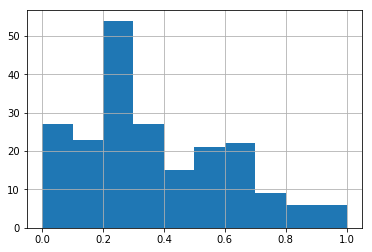

4. Tulevaisuudessa yhä useamman opiskelijan pitäisi siirtyä työelämään pelkällä kandidaatin tutkinnolla.


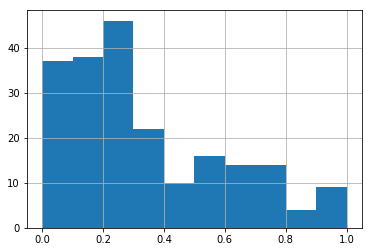

5. Suomessa on lukumäärällisesti liian monta yliopistoa.


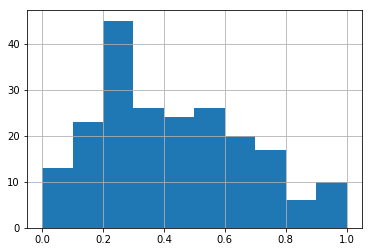

8. Ylioppilaskuntani antaa tarpeeksi osallistumismahdollisuuksia kansainvälisille opiskelijoille.


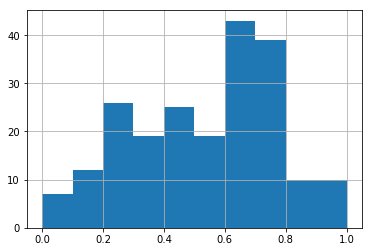

9. Ylioppilaskunta voi ottaa kantaa muihinkin asioihin kuin suoraan koulutukseen, yliopistoihin ja opintososiaalisiin asioihin (opintotuki, asuminen, yms.) liittyviin kysymyksiin.


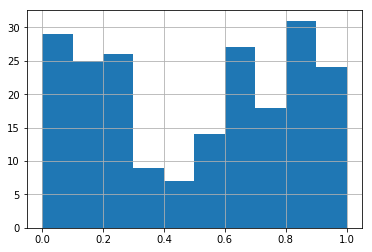

10. Ylioppilaskuntien automaatiojäsenyys tulee säilyttää.


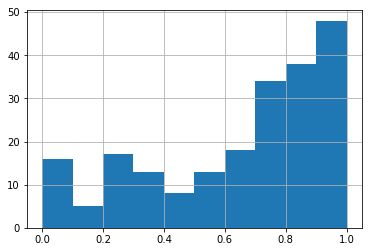

12. Ylioppilaskunnan jäsenmaksua tulisi


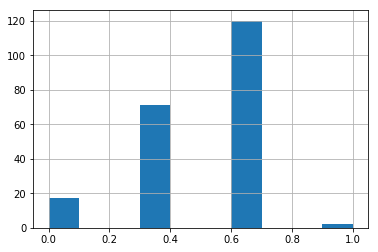

13. Edustajiston jäsenen tulee noudattaa edustajistoryhmän kantaa merkittävissä kysymyksissä. 


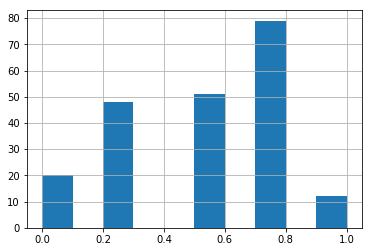

In [ ]:
for question in numeric_questions:
    numeric_data[question].hist()
    print(question)
    plt.show()

In [ ]:
plt.imshow(numeric_data.corr())
plt.colorbar()

# Factor Analytics

In [ ]:
from sklearn.decomposition import FactorAnalysis
model = FactorAnalysis(n_components=2)
model.fit(numeric_data)

# L, T = fr.rotate_factors(model.components_,'quartimax')
# model.components_ = L
# model.components_ = varimax(model.components_)

# R = ortho_rotation(model.components_, method='quartimax', itermax=1000)
# model.components_ = model.components_.dot(R)

In [ ]:
def show_candidate(name):
    cand_index = candidates['Name'].str.contains(name).argmax()
    plt.figure(figsize=(15,10))
    result = model.transform(numeric_data)
    plt.scatter(result[cand_index,0],result[cand_index,1],color='r')
    plt.scatter(result[:,0],result[:,1])
    plt.scatter(result[cand_index,0],result[cand_index,1],color='r')
    plt.legend([candidates['Name'][cand_index]])
show_candidate("Hautam")

In [ ]:
parties = candidates['vaaliliitto'].unique()
parties = np.delete(parties,1)
parties = parties[parties != np.nan]
plt.figure(figsize=(15,10))
for party in parties:
    # print(party)
    party_filter = candidates['vaaliliitto'][filt] == party
    # print(candidates['Name'][filt][party_filter])
    try:
        result = model.transform(numeric_data[party_filter])
        plt.scatter(result[:,0],result[:,1])
    except:
        print("Could not find candidates for", party)
plt.legend(parties)

In [ ]:
top_n = 5

for axis, a in enumerate(['X oikealla reunalla', 'Y yläreunassa']):
    print("Tärkeimmät kysymykset akselin", a)
    for index in np.abs(model.components_[axis,:]).argsort()[-top_n:][::-1]:
        if model.components_[axis,index] > 0:
            effect = "SAMAA MIELTÄ"
        else:
            effect = "ERI MIELTÄ"
        print(effect, numeric_questions[index])
    print()

In [ ]:
plt.bar(np.arange(len(numeric_questions)), model.components_[0,:], 0.35)
plt.bar(np.arange(len(numeric_questions)) + 0.35, model.components_[1,:], 0.35)
plt.legend(['x-akseli', 'y-akseli'])

In [ ]:
import numpy as np

def ortho_rotation(lam, method='varimax', gamma=None, eps=1e-6, itermax=100):
    """
    Return orthogal rotation matrix
    TODO: - other types beyond 
    """
    if gamma == None:
        if (method == 'varimax'):
            gamma = 1.0
        if (method == 'quartimax'):
            gamma = 0.0

    nrow, ncol = lam.shape
    R = np.eye(ncol)
    var = 0

    for i in range(itermax):
        lam_rot = np.dot(lam, R)
        tmp = np.diag(np.sum(lam_rot ** 2, axis=0)) / nrow * gamma
        u, s, v = np.linalg.svd(np.dot(lam.T, lam_rot ** 3 - np.dot(lam_rot, tmp)))
        R = np.dot(u, v)
        var_new = np.sum(s)
        if var_new < var * (1 + eps):
            break
        var = var_new

    return R
        